# Part 1

# 1: Classification: Feature Extraction + Classical Methods

# 1.1: Explanation of Design and Implementation Choices of your Model

Comparison Of Different Feature Extraction Methods And Different Algorithms
----------------------------------------------------------------------------------------------------------------
Initially we have started with different feature extraction techniques such as PCA, T-SNE,Isomap, LDA, LLE, Laplacian Eigenmap, etc for dimensionality reduction. Based on analysis performed we have selected PCA as best dimensionality reduction method because computational time is very less, better speed of convergence, better bias-variance trade-off when compared to different methods.  

Interms of computational time, feature separability, smoothness, curvature, angle and rotation, speed of convergence PCA is the best method for this data when compared to other methods like Isomap,LLE,Laplacian Eigenmap. More the separability of classes higher will be the accuracy, performance of model. We also observed that other models are having high bias and high variance which is not good and cannot separate the classes due to overlapping. If we increase the number of components for remaining methods also we can't able to separate the claases and increase in number of components computational time is too high. Due to this we may not expect the better accuracy, overfits the model, performance, confusion matrix, smoothness for other models. Moreover, PCA compresses our data down to something that is more effectively modeled. This means that it will compress away highly correlated and colinear variables, a useful thing to do when trying to run models that would otherwise be sensitive to these data problems.

Next, We have tried different algorithms such as KNN, Random Forest, Decision Tree, Gradient Boosting, Kernel SVM, LinearSVC, etc. First, We have tried all the algorithms with their respective default parameters. Based on analysis we performed Gradient boosting, KNN is taking high computational time, low speed of convergence, metrics evaluation is also not good and classification accuracy is less than 88% when compared to Kernel SVM and Random Forest. In case of decision tree computaional time is directly proportional to number of estimators and finally its not getting better results and accuracy is less than 88%. 

Based on the results and analysis we have done we can say that Random forest and Kernel SVM performs better for this dataset interms of computational time, classification accuracy, confusion matrix, different metrics evaluation like F1 score, ROC curve, recall, precision and error rate. In order to select the best algorithm among them we performed optimization which is hyperparameter tuning. After performing hyperparameter tuning with different parameters on various algorithms we came to know that kernel svm is the best algorithm that fits the model having less computational time, better confusion matrix, good metrics evaluation when compared to other algorithms, better results and achieving a classification accuracy of almost 90%.
Finally to imrove the performance and to get accuracy of model, we have selected Bagging classifier as ensemble technique.


Why PCA
-----------------------
For feature extraction, we have selected PCA as best dimensionality reduction method because computational time is very less, better speed of convergence, better bias-variance trade-off, smoothness, curvature, angle and rotation when compared to different methods like T-SNE, Isomap, LDA, LLE, Laplacian Eigenmap, etc. Moreover, PCA compresses your data down to something that is more effectively modeled. This means that it will compress away highly correlated and colinear variables, a useful thing to do when trying to run models that would otherwise be sensitive to these data problems. We aslo selected ncomponents=20 because we are getting better accuracy, good speed of execution.

Selected Model and about its parameters
--------------------------------------------------
Now we need to decrease the error rate and increase the accuracy of kernel svm model. As we all know that the parameter C in SVM classifier defines the penalty parameter of the error term. C determines the influence of the misclassification on the objective function. In order to get the better accuracy,less error rate and to select the best regularization we had done hyperparameter tuning on SVM kernel. 

We have took C value as 13 beacuase From the graph we could see as the C-value goes on decreasing the missclassification is increasing and accuracy decreasing. When C-value goes on increasing the missclassification is very less and getting better accuracy. So, choosing too high and too small value of C is not a good idea and we need to choose a best value of C in between them and thus we have selected 13 as best parameter. We have selected gamma as 'Auto' in order to use 1 / nfeatures. If gamma is 'scale' we observe far influence of a single training and there is no improvement in accuracy. As our label is multi class we have selected decision function shape as one-vs-one (‘ovo’) which is always used as multi-class strategy.

Further to improve the accuracy of model we have used Baggingclassifier as ensemble technique. In that we have selected base estimator as kernel SVM as it is the best model with good results like less computational time, better confusion matrix, better metrics evaluation, good speed of convergence. We took number of base estimators in the ensemble as 20(nestimators=20), number of features to draw from X to train each base estimatoras max samples=0.9, max features=0.8 such that the computational time get decreases, speed of model and efficiency of model gets increased to maximum using this technique.


# 1.2: Implementation of your Design Choices 
Libraries used

•	Pandas was used to handle the Data frames and to make the statistics calculations like mean, standard deviation, variance, skewness and mode.

•	NumPy was used to handle arrays and to perform different calculations.

•	Scikit learn an open-source machine learning library for Python and contains a helpful pre-processing module that can help us do the data pre-processing, PCA, LDA, Manifold Learning methods, accuracy, data splitting, solving algorithms.

•	Seaborn, MATLAB was used to build the subplots, plots.

•	Math is for all mathematical calculations

•	Timeit is used to measure execution time of small code snippets

•	All the classification libraries are imported

•	Modelling helpers for calculating scores and metrics of the model developed

•	Pre-processing libraries are used for normalizing the data

•	All the non-linear and linear feature extraction techniques are used for feature reduction


In [1]:
#Importing Libraries

# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Modelling Helpers :
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score

#preprocessing :
from sklearn.preprocessing import MinMaxScaler , StandardScaler, LabelEncoder

#evaluation metrics :
# Classification
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  

#Feature Extraction :
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn.decomposition import KernelPCA
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import SpectralEmbedding
from sklearn.manifold import TSNE


# Visualisation
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
plt.style.use('fivethirtyeight')
sns.set(context="notebook", palette="dark", style = 'whitegrid' , color_codes=True)

Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples.

Each example is a 28x28 grayscale image, associated with a label of 5 classes.

In [2]:
#Loading The dataset
train_data = pd.read_csv('Fashion_Train.csv')
test_data = pd.read_csv('Fashion_Test.csv')


In [3]:
#Check For Missing Values
print("Missing Data in training data:", train_data.isnull().values.any())
print("Missing Data in testing data:", test_data.isnull().values.any())

Missing Data in training data: False
Missing Data in testing data: False


In [4]:
#Removing Label and Id From Train Data
labels = train_data['Label']
Id = train_data['Id']
train_data.drop(columns = ['Id','Label'], inplace = True)



In [5]:
#Removing Id From Test Data
ID = test_data['Id']
test_data.drop(columns = ['Id'], inplace = True)


Normalization is done as below:

x = (x - min) / (max - min) ; Here min=0 and max=255

In [6]:
#casting into double/float from int before you doing scaling. You will most likely generate floating point numbers.
# If it been int, the values will be truncated to zero.
#scale the data by dividing by 255, as pixels range between 0-255
train_data = train_data.astype("float32")/255
test_data = test_data.astype("float32")/255
print(train_data.shape)
print(test_data.shape)

(60000, 784)
(10000, 784)


Spliting the training data into Train and Validation Set. Train set is used for Training the model and Validation set is used for Evaluating our Model's Performance on the Dataset. Random seed is for reproducibility.

In [7]:
#Splitting dataset into train-90% and test-10%
seed = 66
np.random.seed(seed)
X_train, X_test, Y_train, Y_test = train_test_split(train_data, labels, test_size=0.1, random_state = seed)
print(X_train.shape)
print(X_test.shape)

(54000, 784)
(6000, 784)


For feature extraction, We have selected PCA as best dimensionality reduction method because computational time is very less, better speed of convergence, better bias-variance trade-off, smoothness, curvature, angle and rotation when compared to different methods like T-SNE, Isomap, LDA, LLE, Laplacian Eigenmap, etc. Moreover, PCA compresses your data down to something that is more effectively modeled. This means that it will compress away highly correlated and colinear variables, a useful thing to do when trying to run models that would otherwise be sensitive to these data problems. we have used components as 20 thus the shape of training and validation data is reduced to 60000x20 and 10000x20 which consumes less computation time and more precise results

In [8]:
# Fitting PCA on train data and transform test data

pca = PCA(n_components = 20)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
test_data = pca.transform(test_data)
print(test_data.shape)
print(X_train.shape)
print(X_test.shape)

(10000, 20)
(54000, 20)
(6000, 20)


All the Classifier with default parameters are represented below and the respective accuracies are the respective metrics are displayed below.

In [9]:
from sklearn.ensemble import GradientBoostingClassifier
classifiers=[]
model1 = KNeighborsClassifier()
classifiers.append(model1)
model2 = svm.SVC()
classifiers.append(model2)
model3 = DecisionTreeClassifier()
classifiers.append(model3)
model4 = RandomForestClassifier()
classifiers.append(model4)
model5=GradientBoostingClassifier()
classifiers.append(model5)

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
acc_list=[]
precision_list=[]
recall_list=[]

for clf in classifiers:
    clf.fit(X_train, Y_train)
    y_pred= clf.predict(X_test)
    acc = accuracy_score(Y_test, y_pred)
    acc_list.append(acc)
    print("Accuracy of %s is %s"%(clf, acc))
    cm = confusion_matrix(Y_test, y_pred)
    print("Confusion Matrix of %s is %s"%(clf, cm))
    print(metrics.classification_report(y_pred, Y_test))
    


Accuracy of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') is 0.8625
Confusion Matrix of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') is [[1109   44    7    1    2]
 [  59 1052   77   23    3]
 [  43  101  915  109   20]
 [   0   32  110 1006   78]
 [   3    5   29   79 1093]]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1214
           1       0.87      0.85      0.86      1234
           2       0.77      0.80      0.79      1138
           3       0.82      0.83      0.82      1218
           4       0.90      0.91      0.91      1196

    accuracy                           0.86      6000
   macro avg       0.86      0.86      0.86      6000
weight

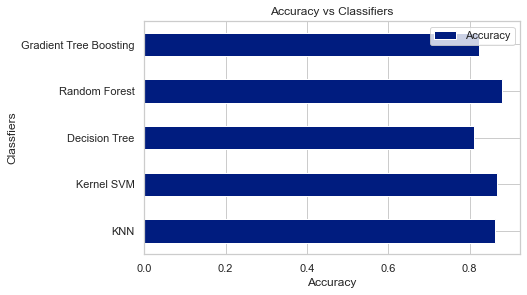

In [11]:

classifier=pd.DataFrame(classifiers,columns=['Classifiers'])
classifier.insert(1,"Accuracy",acc_list)
a=classifier.plot(kind='barh')
a.set_yticklabels(['KNN','Kernel SVM','Decision Tree','Random Forest','Gradient Tree Boosting'])
a.set_title('Accuracy vs Classifiers')
a.set_xlabel('Accuracy')
a.set_ylabel('Classfiers')

plt.show()

The above bar graph represents different classifiers with accuracies where the Kernel SVM and Random Forest has the best accuracies. From the above results and bar graph we can say that Gradient boosting is taking very high computational time for execution and less classification accuracy of 82%, less f1score, precision, recall when compared to Random Forest, Decision Tree, Kernel SVM and KNN. Next Decision Tree and KNN got accuracy of morethan 80% but there is a drawback interms of computational time, confusion matrix, different metrics when compared to Random Forest and Kernel SVM. Finally For Random Forest and Kernel SVM, We got highest accuracies of more than 85% and taking less computational time, better different evaluation metrics when compared to other algorithms.

## After hyperparameter tuning and the results we got from both Random Forest and Kernel SVM, We have selected Kernel SVM best fit the model interms of less computational time, ROC curves, high classification accuracies, different metrics evaluation like confusion matrix, f1score, precision, recall, less error rate when compared to Random Forest. However we did the ROC curves for both Randon Forest and Kernel SVM  are shown below.

## First We Are Performing Hyperparameter Tuning And Plotting ROC Curve FOR Random Forest

In [12]:
#considering different parameters of Random Forest Classifers
model = RandomForestClassifier(criterion='entropy' ,max_depth=100, n_estimators=50)
model.fit(X_train, Y_train)
y_pred_rf= model.predict(X_test)
acc_rf = accuracy_score(Y_test, y_pred_rf)
y_pred_rf.shape
print("Accuracy of Random Forest : ",(acc_rf))

Accuracy of Random Forest:%s 0.8743333333333333


<ipython-input-13-e45dfde1fed2>:30: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


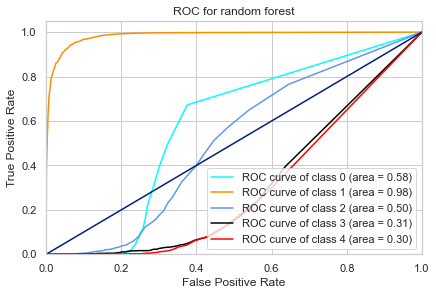

In [13]:
from sklearn.preprocessing import label_binarize
#Randomforest Classifier
model = RandomForestClassifier(criterion='entropy' ,max_depth=100, n_estimators=50)
model.fit(X_train, Y_train)
y_pred_rf_roc= model.predict_proba(X_test)
#Label = label_binarize(Label)
n_classes = 5
n_classes
#plotting ROC curve(Random Forest)
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.metrics import roc_auc_score
# Compute ROC curve and ROC area for each class
fpr = dict()

tpr = dict()

roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test, y_pred_rf_roc[:,i], pos_label = 1)
    roc_auc[i] = auc(fpr[i], tpr[i])
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))


# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["weighted"] = all_fpr
tpr["weighted"] = mean_tpr
roc_auc["weighted"] = auc(fpr["weighted"], tpr["weighted"])

#plotting ROc for all classes

colors = ['aqua', 'darkorange', 'cornflowerblue', 'black','red']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for random forest')
plt.legend(loc="lower right")
plt.show()

The above graph is plotted for multiclass as we have 5 classes, we have individual ROC curve for all the 5 classes, the straight line represents AUC of 0.5, When there are more than two classes, it is extremely difficult, and usually impossible, to provide realistic assessments of the relative severity of the different kinds of misclassification which can arise. This is equivalent to the probability that a randomly chosen member of one class has a smaller estimated probability of belonging to the other class than has a randomly chosen member of the other class, and so is a natural measure of separability between the two estimated probability distributions thus for class1 has the highest AUC value (0.98) and for class4 and class3 has the least AUC value. AUC near to the 0 which means it has worst measure of separability.

## Hyperparameter Tuning And Selecting Best C Value For Kernel SVM

In [14]:
#considering SVM for different C values
C_value=range(1,20)
acc = []
for i in C_value:
    b=svm.SVC(C=i, kernel='rbf',gamma='auto', decision_function_shape='ovo')
    b.fit(X_train, Y_train)
    y_pred_model= b.predict(X_test)
    acc_1 = accuracy_score(Y_test, y_pred_model)
    acc.append(acc_1)
    


Text(0, 0.5, 'Accuracy')

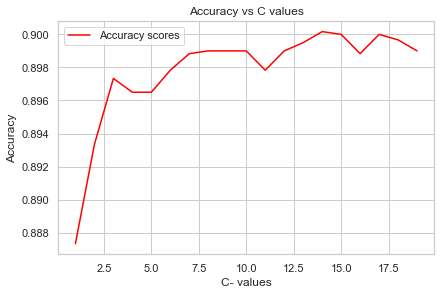

In [15]:
df= pd.DataFrame(acc,C_value,columns = ['Accuracy scores'])
df = df.rename_axis('C_value')
#Plotting graph for above tabular data
df.plot(color='red')

plt.title('Accuracy vs C values')
plt.xlabel('C- values')
plt.ylabel('Accuracy')


From the above graph we can say increasing the C-values results in fluctuations and at C=13 we got maximum accuracy. Also we observed as the C-value goes on decreasing the missclassification is increasing and accuracy decreasing. When C-value goes on increasing the missclassification is very less and getting better accuracy. In SVM, large C-value results in small margin and small C-value results in large margin. So, choosing too high and too small value of C is not a good idea and we need to choose a best value of C in between them. So, we have selected C=13.

## Fitting Kernel SVM In Bagging Classifier. Claculating The Run Time And Evaluating Test Data

In [16]:
#Accuracy on training data(SVM)
#Computational time(Start)
import timeit
start = timeit.default_timer()
from sklearn.ensemble import BaggingClassifier
clf1=SVC(C=13,kernel='rbf',gamma='auto', decision_function_shape='ovo')
bagging1 = BaggingClassifier(base_estimator=clf1, n_estimators=20, max_samples=0.9, max_features=0.8)
bagging1.fit(X_train, Y_train)
Y_pred_svm = bagging1.predict(X_test)
acc_svm = accuracy_score(Y_test, Y_pred_svm)
print("Accuracy of Kernel SVM is : ",(acc_svm))
stop = timeit.default_timer()
execution_time_traindata = stop - start
print('time taken to execute training data in seconds:', execution_time_traindata)

Accuracy of Kernel SVM is :  0.901
time taken to execute training data in seconds: 451.37093892400003


In [17]:
#predict on test data(SVM)
start = timeit.default_timer()
clf1=SVC(C=13,kernel='rbf',gamma='auto', decision_function_shape='ovo')
bagging1 = BaggingClassifier(base_estimator=clf1, n_estimators=20, max_samples=0.9, max_features=0.8)
bagging1.fit(X_train, Y_train)
Y_Data = bagging1.predict(test_data)
print(Y_Data.shape)

stop = timeit.default_timer()
execution_time_testdata = stop - start
print('time taken to execute testing data in seconds:', execution_time_testdata)

(10000,)
time taken to execute testing data in seconds: 537.7422943209999


## Plotting ROC Curve For Kernel SVM

In [18]:
 from sklearn.ensemble import BaggingClassifier
clf1=SVC(C=13,kernel='rbf',gamma='auto', decision_function_shape='ovo')
bagging1 = BaggingClassifier(base_estimator=clf1, n_estimators=20, max_samples=0.9, max_features=0.8)
bagging1.fit(X_train, Y_train)
Y_pred_svm_roc = bagging1.predict_proba(X_test)
from sklearn.preprocessing import label_binarize
#Label = label_binarize(Label)
n_classes = 5
n_classes

5

In [19]:
#plotting ROC curve
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.metrics import roc_auc_score
# Compute ROC curve and ROC area for each class
fpr = dict()

tpr = dict()

roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test, Y_pred_svm_roc[:,i], pos_label = 1)
    roc_auc[i] = auc(fpr[i], tpr[i])


<ipython-input-20-68424654f033>:8: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


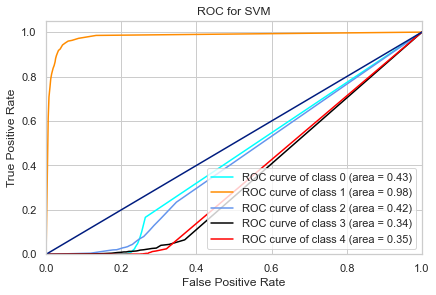

In [20]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))


# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["weighted"] = all_fpr
tpr["weighted"] = mean_tpr
roc_auc["weighted"] = auc(fpr["weighted"], tpr["weighted"])

#plotting ROc for all classes

colors = ['aqua', 'darkorange', 'cornflowerblue', 'black','red']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for SVM')
plt.legend(loc="lower right")
plt.show()

The above graph is plotted for multiclass as we have 5 classes, we have individual ROC curve for all the 5 classes, the straight line represents AUC of 0.5, When there are more than two classes, it is extremely difficult, and usually impossible, to provide realistic assessments of the relative severity of the different kinds of misclassification which can arise. This is equivalent to the probability that a randomly chosen member of one class has a smaller estimated probability of belonging to the other class than has a randomly chosen member of the other class, and so is a natural measure of separability between the two estimated probability distributions. Class1 has the highest AUC of 0.98 and for other classes the AUC is around 0.35 to 0.5 which is much better results when compared with the ROC curve of Random Forest and as senstivity and specificity are inversely proportional by comparing each classes of Kernal SVM with each class of Random Forest we can say that Kernal SVM classes have more specificity and less senstivity when compared with Random forest.

# 1.3 Kaggle Competation

In [21]:
Final_res = pd.DataFrame(ID)
Final_res.columns = ['Id']
Final_res.insert(1,'Label',Y_Data)
Final_res.head()
#Kaggle Competation
Final_res.to_csv("PCA60000x20_Final_Bagging.csv",index=False)

The highest score we received on Kaggle is 90.100%. According to our analysis we can say that even there is a change in single parameter we experience a big change in accuracy, metrics, performance of model. All the other teams may used different feature extraction methods, different algorithms, hyperparameter tuning, splitting of data, normalization and boosting techniques. Due to that we are experiencing different performances on kaggle. 

# 1.4 Results Analysis

# Runtime performance for training and testing.
We have tried the best classifier on training and testing data and as the feature size is 784 the runtime for training and testing data is very large thus by using feature extraction methods such as PCA with components as 20 we has reduced the computation run time of both training and testing data. When compared with all the remaining algorithms, feature extraction methods, PCA with Kernel SVM wth bagging classifier is give higest accuracy and less computational time. This is because of PCA will use variance of each feature for separability remaining methods like LDA, T-SNE uses information of classes and takes more time. Gradient boosting, Decision tree takes more time due to trees depth. Any way we need to consider all the factors into account to build a model and thus we selected this model.

The run time performance of training data is: 451.37 seconds

The run time performance of testing data is: 537.74 seconds




# Comparison of the different algorithms and parameters you tried.

We have splitted the data in testing and training sets and training our model with different classifiers such as Knn, SVM, Decision tree, Random forest, Gradient Boosting. The above bar graph depicts different classifiers and accuracy values and we have also considered all the metrics scores of different classifiers such as precision, f1score, recall and confusion matrix.

From the above bar graph we came to a conclusion that both random forest classifier and SVM has the best accuracy results and by using Grid Search CV(as it takes more computational time we haven’t included it in the code) we found the best parameters for Random Forest and SVM as for random forest the complexity is high, more computational power and longer training period, thus the accuracy and other metrics results of SVM are found to be the best Algorithm. 

We have tried different algorithms such as KNN, Random Forest, Decision Tree, Gradient Boosting, Kernel SVM, LinearSVC, etc. First, We have tried all the algorithms with their respective default parameters. Based on analysis we performed Gradient boosting, KNN is taking high computational time, low speed of convergence, metrics evaluation is also not good and classification accuracy is less than 88% when compared to Kernel SVM and Random Forest. In case of decision tree computaional time is directly proportional to number of estimators and finally its not getting better results and accuracy is less than 88%. 

Based on the results and analysis we have done we can say that Random forest and Kernel SVM performs better for this dataset interms of computational time, classification accuracy, confusion matrix, different metrics evaluation like F1 score, ROC curve, recall, precision and error rate. In order to select the best algorithm among them we performed optimization which is hyperparameter tuning. After performing hyperparameter tuning with different parameters on various algorithms we came to know that kernel svm is the best algorithm that fits the model having less computational time, better confusion matrix, good metrics evaluation when compared to other algorithms, better results and achieving a classification accuracy of almost 90%.
Finally to imrove the performance and to get accuracy of model, we have selected Bagging classifier as ensemble technique.



# Explanation of your model (algorithms, design choices, numbers of parameters)


Why PCA
-----------------------
For feature extraction, we have selected PCA as best dimensionality reduction method because computational time is very less, better speed of convergence, better bias-variance trade-off, smoothness, curvature, angle and rotation when compared to different methods like T-SNE, Isomap, LDA, LLE, Laplacian Eigenmap, etc. Moreover, PCA compresses your data down to something that is more effectively modeled. This means that it will compress away highly correlated and colinear variables, a useful thing to do when trying to run models that would otherwise be sensitive to these data problems. We aslo selected n_components=20 because we are getting better accuracy, good speed of execution.

Selected Algorithm, Design and about its parameters
------------------------------------------------------------------------------
Now we need to decrease the error rate and increase the accuracy of kernel svm model. As we all know that the parameter C in SVM classifier defines the penalty parameter of the error term. C determines the influence of the misclassification on the objective function. In order to get the better accuracy,less error rate and to select the best regularization we had done hyperparameter tuning on SVM kernel. 

We have took C value as 13 beacuase From the graph we could see as the C-value goes on decreasing the missclassification is increasing and accuracy decreasing. When C-value goes on increasing the missclassification is very less and getting better accuracy. So, choosing too high and too small value of C is not a good idea and we need to choose a best value of C in between them and thus we have selected 13 as best parameter. We have selected gamma as 'Auto' in order to use 1 / n_features. If gamma is 'scale' we observe far influence of a single training and there is no improvement in accuracy. As our label is multi class we have selected decision function shape as one-vs-one (‘ovo’) which is always used as multi-class strategy.

Further to improve the accuracy of model we have used Baggingclassifier as ensemble technique. In that we have selected base_estimator as kernel SVM as it is the best model with good results like less computational time, better confusion matrix, better metrics evaluation, good speed of convergence. We took number of base estimators in the ensemble as 20(n_estimators=20), number of features to draw from X to train each base estimatoras max_samples=0.9, max_features=0.8 such that the computational time get decreases, speed of model and efficiency of model gets increased to maximum using this technique.


# Use a ROC curve used for some method in your initial or results analysis such as exploring the impact on accuracy of some parameter.


AUC-ROC curve is one of the most commonly used metrics to evaluate the performance of machine learning algorithms particularly in the cases where we have imbalanced datasets. ROC is a probability curve for different classes. A Roc curve has FPR (False Positive Rate) vs TPR (True Positive Rate)

The area covered is AUC (Area under curve). The bigger the area covered, the better the machine learning models is at distinguishing the given classes. Ideal value for AUC is 1.

The above graph is plotted for multiclass as we have 5 classes, we have individual ROC curve for all the 5 classes, thus for class_1 has the highest AUC value (0.98) and for class_4 has the least AUC value. AUC near to the 0 which means it has worst measure of separability.

As mentioned above, When there are more than two classes, it is extremely difficult, and usually impossible, to provide realistic assessments of the relative severity of the different kinds of misclassification which can arise. This is equivalent to the probability that a randomly chosen member of one class has a smaller estimated probability of belonging to the other class than has a randomly chosen member of the other class, and so is a natural measure of separability between the two estimated probability distributions. Class_1 has the highest AUC of 0.98 and for other classes the AUC is around 0.35 to 0.5 which is much better results when compared with the ROC curve of Random Forest and as senstivity and specificity are inversely proportional by comparing each classes of Kernal SVM with each class of Random Forest we can say that Kernal SVM classes have more specificity and less senstivity when compared with Random forest.


On concluding, ROC curve of Random forest Algorithm SVM has the best AUC curve for all the classes. If the value is greater than 0.6 then the chance of model will be able to distinguish between positive class and negative class


# Evaluate your code with other metrics on the training data (by using some of it as test data) and argue for the benefit of you approach.

Different Classifier are used such as Knn, SVM, Decision Tree and Random Forest where different metrics such as f1 score, precision score, recall, support and Confusion matrix are evaluated. Confusion matrix is analysed in initial stage. Here we are going to analyse and discuss about F1score, Precision, Recall.
1.	F1 score:
One popular metric which combines precision and recall is called F1-score, which is the harmonic mean of precision and recall defined as:
F1-score= 2*Precision*Recall/(Precision+Recall)

Sno:	Classifier	f1 score(highest)
1	Knn	0.86
2	SVM	0.90
3	Decision Tree	0.81
4	Random Forest	0.88
5	Gradient Boosting	0.76

2.	Precision:
Therefore we need to look at class specific performance metrics too. Precision is one of such metrics, which is defined as:
Precision= True_Positive/ (True_Positive+ False_Positive)

Sno:	Classifier	Precision score(highest)
1	Knn	0.90
2	SVM	0.93
3	Decision Tree	0.89
4	Random Forest	0.92
5	Gradient Boosting	0.83

3.	Recall:
Recall is another important metric, which is defined as the fraction of samples from a class which are correctly predicted by the model. More formally:
Recall= True_Positive/ (True_Positive+ False_Negative)
Sno:	Classifier	Recall(highest)
1	Knn	0.91
2	SVM	0.92
3	Decision Tree	0.90
4	Random Forest	0.95
5	Gradient Boosting	0.87


By considering the above metrics for all the classifier we can depict  that SVM has the best accuracy and metrics values when compared with all the classifiers and Works well with even unstructured and semi structured data like text, Images  and SVM models have generalization in practice, the risk of over-fitting is less in SVM and it has the property of scaling relatively well to high dimensional data.
